In [1]:
"""
GravMag: 3D forward modeling of total-field magnetic anomaly using triaxial
ellipsoids (model with induced and remanent magnetization)
"""
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from fatiando import mesher, gridder, utils
from fatiando.gravmag import ellipsoid_triaxial,ellipsoid_prolate,ellipsoid_oblate,sphere

C:\Users\diego_000\Documents\fatiando\fatiando\vis\mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [2]:
# The regional field
inten,inc, dec = 60000., 50., 20.
bounds = [-5000, 5000, -5000, 5000, 0, 5000]
# Create a regular grid at 100m height
shape = (200, 200)
area = bounds[:4]
xp, yp, zp = gridder.regular(area, shape, z=0)

## Triaxial X Sphere

In [3]:
model_t1 = [mesher.EllipsoidTriaxial(0.,0.,1000.,500.0001, 500.0, 499.9999,0.,0.,0., 
                                 {'remanence': [10000, 25., 40.],
                                  'k': [0.01, 0.01, 0.01, 0., 90., 90.]})]

model_s = [mesher.Sphere(0.,0.,1000.,500.,
                  {'magnetization': utils.ang2vec(95.97970, 25.000025, 39.99997)})]

# Calculate the anomaly for a given regional field
tf_t,N1,N2,N3,JRD_ang = ellipsoid_triaxial.tf_c(xp,yp,zp,1.,inc,dec,model_t1)

tf_s = sphere.tf(xp, yp, zp, model_s, inc, dec)

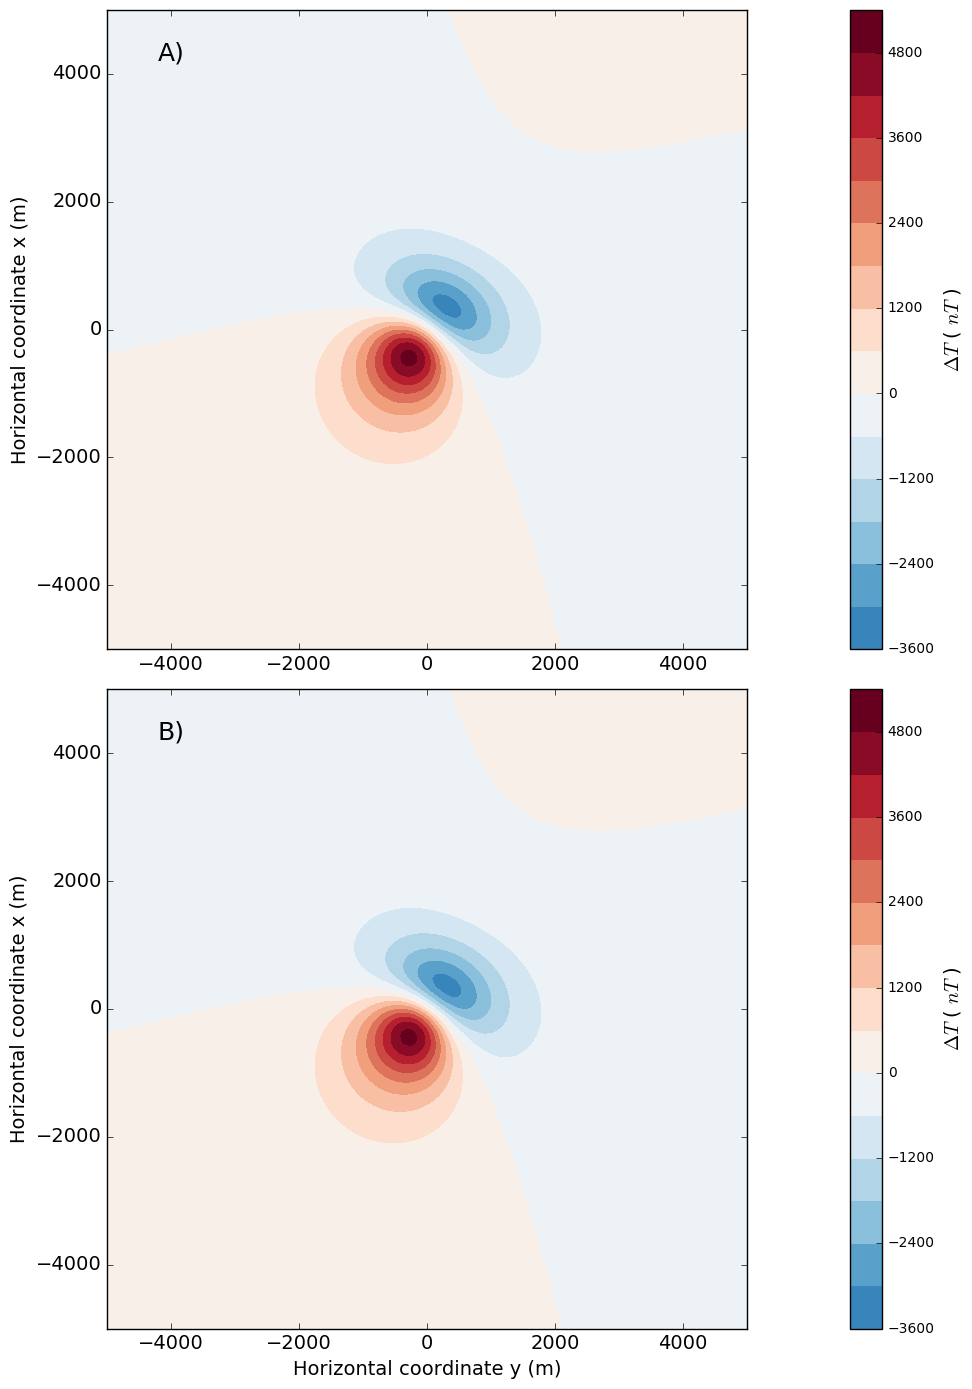

In [4]:
rangestf = np.max(np.abs([np.max(tf_t), np.min(tf_t),
                          np.max(tf_s), np.min(tf_s)]))


plt.figure(figsize=(21,14))

plt.subplot(2,1,1)
plt.title('A)', y=0.91, x=0.1, fontsize=18)
plt.axis('scaled')
plt.tricontourf(yp,xp,tf_t,15,
            vmin = -rangestf, vmax = rangestf,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=1)
cb.set_label('$\Delta T$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(bounds[2],bounds[3])
plt.ylim(bounds[0],bounds[1])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel('Horizontal coordinate y (m)', fontsize=14)
plt.ylabel('Horizontal coordinate x (m)', fontsize=14)

plt.subplot(2,1,2)
plt.title('B)', y=0.91, x=0.1, fontsize=18)
plt.axis('scaled')
plt.tricontourf(yp,xp,tf_s,15,
            vmin = -rangestf, vmax = rangestf,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=1)
cb.set_label('$\Delta T$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(bounds[2],bounds[3])
plt.ylim(bounds[0],bounds[1])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Horizontal coordinate y (m)', fontsize=14)
plt.ylabel('Horizontal coordinate x (m)', fontsize=14)

plt.tight_layout()
plt.savefig('..\\figures\\ellipsoid_triaxial_sphere.pdf', dpi = 600, facecolor='w', bbox_inches='tight')

## Triaxial X Prolate

In [9]:
model_t2 = [mesher.EllipsoidTriaxial(0.,0.,1000.,500.,100.,99.99,90.,45.,0., 
                                 {'remanence': [10000, 90., 0.],
                                  'k': [0.2, 0.1, 0.05, 0., 90., 90.]})]

# Calculate the anomaly for a given regional field
tf_t,N1,N2,N3,JRD_ang = ellipsoid_triaxial.tf_c(xp,yp,zp,inten,inc,dec,model_t2)

model_p = [mesher.EllipsoidProlate(0.,0.,1000.,500.,100.,90.,45., 
                                 {'remanence': [10000, 90., 0.],
                                  'k': [0.2, 0.1, 0.05, 0., 90., 90.]})]

# Calculate the anomaly for a given regional field
tf_p,N1,N2 = ellipsoid_prolate.tf_c(xp,yp,zp,inten,inc,dec,model_p)

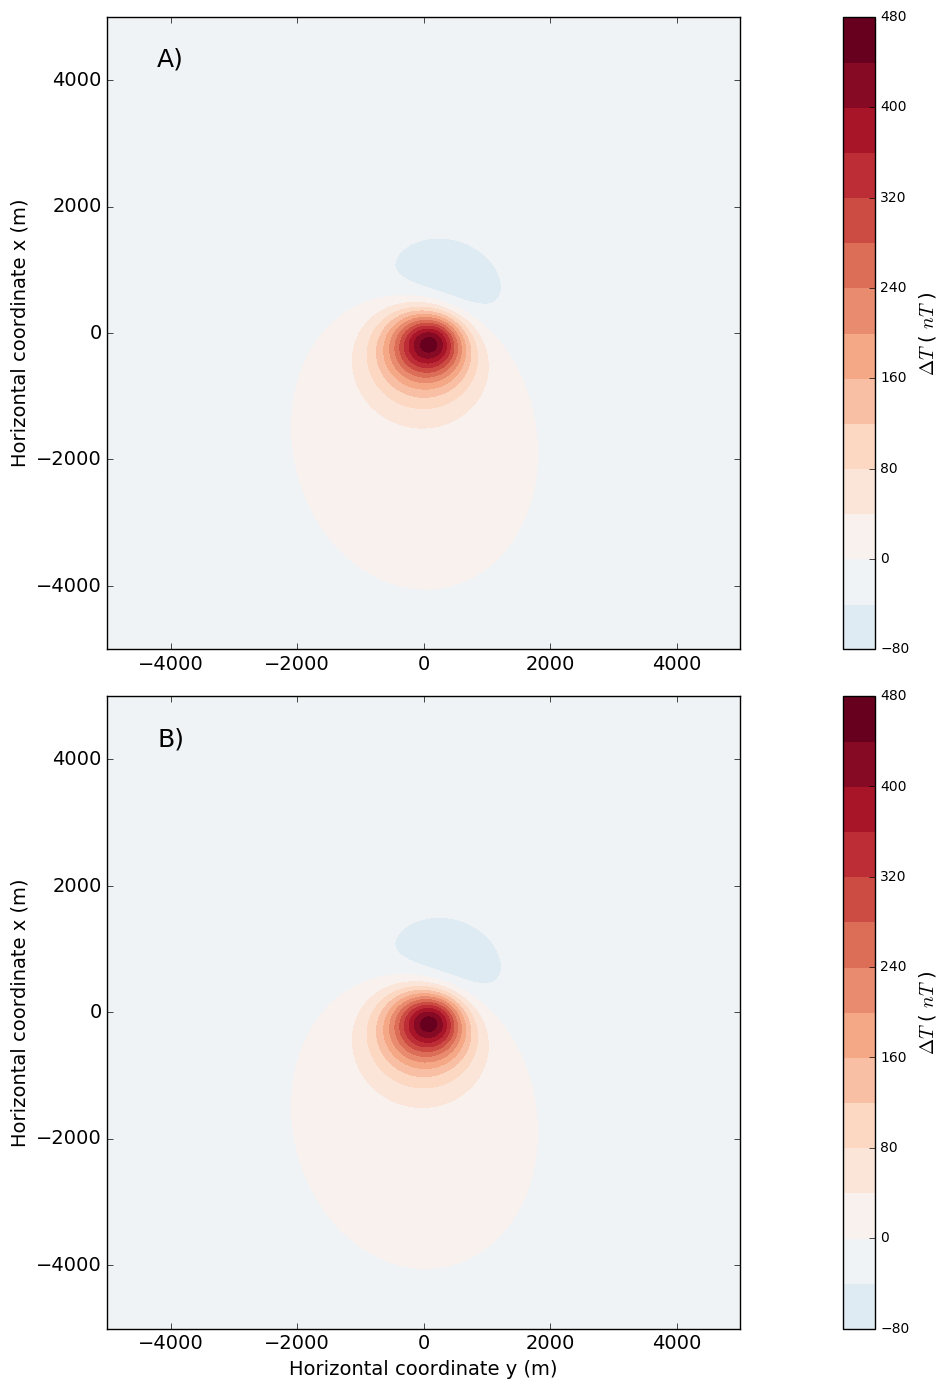

In [10]:
rangestf = np.max(np.abs([np.max(tf_t), np.min(tf_t),
                          np.max(tf_p), np.min(tf_p)]))


plt.figure(figsize=(21,14))

plt.subplot(2,1,1)
plt.title('A)', y=0.91, x=0.1, fontsize=18)
plt.axis('scaled')
plt.tricontourf(yp,xp,tf_t,15,
            vmin = -rangestf, vmax = rangestf,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=1)
cb.set_label('$\Delta T$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(bounds[2],bounds[3])
plt.ylim(bounds[0],bounds[1])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel('Horizontal coordinate y (m)', fontsize=14)
plt.ylabel('Horizontal coordinate x (m)', fontsize=14)

plt.subplot(2,1,2)
plt.title('B)', y=0.91, x=0.1, fontsize=18)
plt.axis('scaled')
plt.tricontourf(yp,xp,tf_p,15,
            vmin = -rangestf, vmax = rangestf,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=1)
cb.set_label('$\Delta T$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(bounds[2],bounds[3])
plt.ylim(bounds[0],bounds[1])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Horizontal coordinate y (m)', fontsize=14)
plt.ylabel('Horizontal coordinate x (m)', fontsize=14)

plt.tight_layout()
plt.savefig('..\\figures\\ellipsoid_triaxial_prolate.pdf', dpi = 600, facecolor='w', bbox_inches='tight')

## Triaxial X Oblate

In [21]:
model_t3 = [mesher.EllipsoidTriaxial(0.,0.,1000.,500.,499.99,499.98,0.,0.,90., 
                                 {'remanence': [10000, 90., 0.],
                                  'k': [0.01, 0.01, 0.01, 0., 90., 90.]})]



# Calculate the anomaly for a given regional field
tf_t,N1,N2,N3,JRD_ang = ellipsoid_triaxial.tf_c(xp,yp,zp,inten,inc,dec,model_t3)

model_o = [mesher.EllipsoidOblate(0.,0.,1000.,499.99,500.,0.,0., 
                                 {'remanence': [10000, 90., 0.],
                                  'k': [0.2, 0.1, 0.05, 0., 90., 90.]})]

# Calculate the anomaly for a given regional field
tf_o,N1,N2 = ellipsoid_oblate.tf_c(xp,yp,zp,inten,inc,dec,model_o)

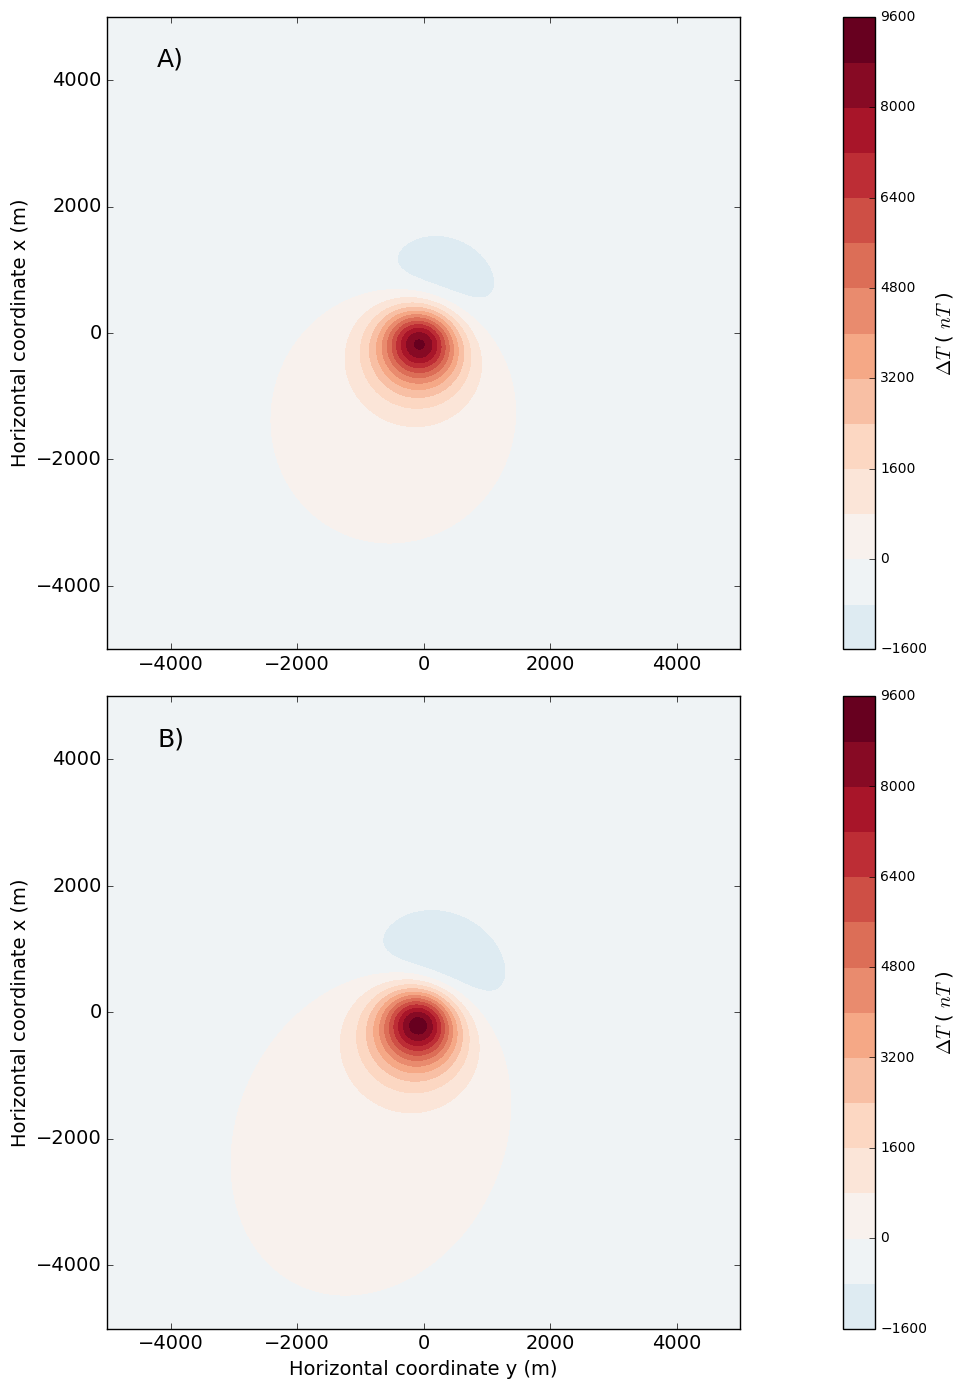

In [23]:
rangestf = np.max(np.abs([np.max(tf_t), np.min(tf_t),
                          np.max(tf_o), np.min(tf_o)]))


plt.figure(figsize=(21,14))

plt.subplot(2,1,1)
plt.title('A)', y=0.91, x=0.1, fontsize=18)
plt.axis('scaled')
plt.tricontourf(yp,xp,tf_t,15,
            vmin = -rangestf, vmax = rangestf,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=1)
cb.set_label('$\Delta T$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(bounds[2],bounds[3])
plt.ylim(bounds[0],bounds[1])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel('Horizontal coordinate y (m)', fontsize=14)
plt.ylabel('Horizontal coordinate x (m)', fontsize=14)

plt.subplot(2,1,2)
plt.title('B)', y=0.91, x=0.1, fontsize=18)
plt.axis('scaled')
plt.tricontourf(yp,xp,tf_o,15,
            vmin = -rangestf, vmax = rangestf,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=1)
cb.set_label('$\Delta T$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(bounds[2],bounds[3])
plt.ylim(bounds[0],bounds[1])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Horizontal coordinate y (m)', fontsize=14)
plt.ylabel('Horizontal coordinate x (m)', fontsize=14)

plt.tight_layout()
plt.savefig('..\\figures\\ellipsoid_triaxial_oblate.pdf', dpi = 600, facecolor='w', bbox_inches='tight')